In [58]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE



In [59]:
import warnings

warnings.filterwarnings("ignore")

# Read the data

In [60]:
df = pd.read_csv("Data_Cortex_Nuclear.csv",encoding = "ISO-8859-1")

In [61]:
df = df.iloc[:,1:-4]

In [62]:
df

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,0.275547,0.190483,NaN,0.115806,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823
1076,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,0.283207,0.190463,NaN,0.113614,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478
1077,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,0.290843,0.216682,NaN,0.118948,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825
1078,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,0.306701,0.222263,NaN,0.125295,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031


# PCA dimension reduction and visualization of the data

## 2 dimensions

In [63]:
pca_2dim = PCA(n_components=2)

In [64]:
df.isna().sum()

DYRK1A_N       3
ITSN1_N        3
BDNF_N         3
NR1_N          3
NR2A_N         3
            ... 
SYP_N          0
H3AcK18_N    180
EGR1_N       210
H3MeK4_N     270
CaNA_N         0
Length: 77, dtype: int64

##### Za da mozheme da napravime namaluvanje na dimenzionalnost treba da gi eliminirame null vrednostite, mozheme so brishenje na redicite koi imaat null vrednosti, no taka polovina podatochno mnozhestvo kje treba da go izbrisheme. Za celite na ovaa laboratoriska vezhba ke iskoristime Simple Imputer so strategija sredna vrednost.

In [65]:
mean_imputer = SimpleImputer(strategy='mean')

In [66]:
df_imputed_mean = mean_imputer.fit_transform(df)

In [67]:
df_pca_2dim = pca_2dim.fit_transform(df_imputed_mean)

In [68]:
df_pca_2dim

array([[ 1.33783565,  2.74036117],
       [ 0.92347474,  2.50339481],
       [ 0.894646  ,  2.51039517],
       ...,
       [-2.80183078, -0.74375694],
       [-2.51784238, -0.66635383],
       [-1.97329921, -0.5398095 ]])

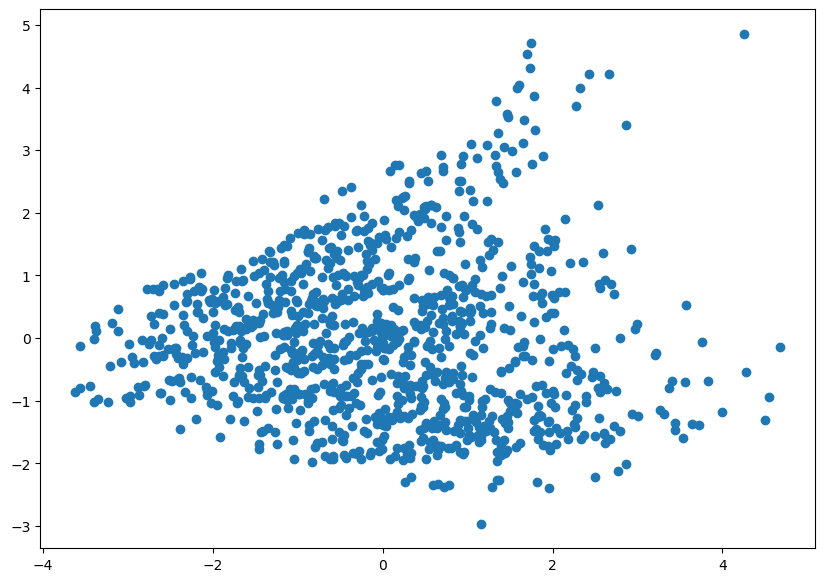

In [69]:
plt.figure(figsize=(10, 7))
plt.scatter(df_pca_2dim[:,0],df_pca_2dim[:,1])

## 3 dimensions

In [70]:
pca_3dim = PCA(n_components=3)

In [71]:
df_pca_3dim = pca_3dim.fit_transform(df_imputed_mean)

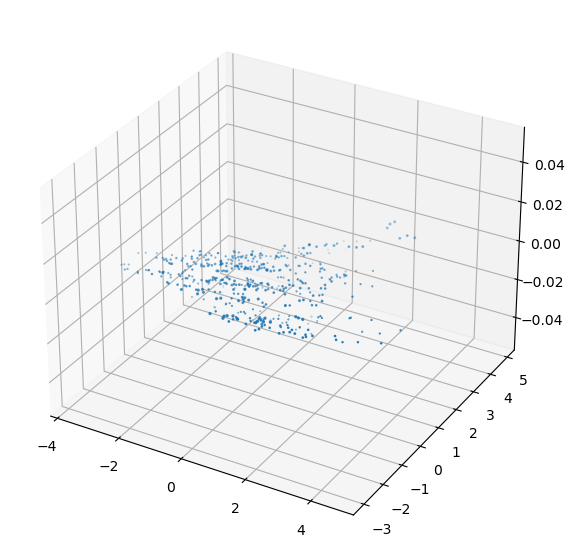

In [72]:
plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
plt.scatter(df_pca_3dim[:,0],df_pca_3dim[:,1],df_pca_3dim[:,2])

# Clustering

In [73]:
%pip install kneed

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


##### Da go eliminirame "curse of dimensionality" i da zashtedime procesirachko vreme ubavo e da ja namalime dimenzionalnosta na podatocite pred da izvrshime klasteriranje.

In [74]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df_imputed_mean)

## GMM

In [75]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold
import itertools
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.spatial import distance
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from scipy import linalg


In [76]:
colors = ['navy', 'turquoise', 'darkorange', 'red', 'green', 'yellow', 'pink', 'violet']
def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

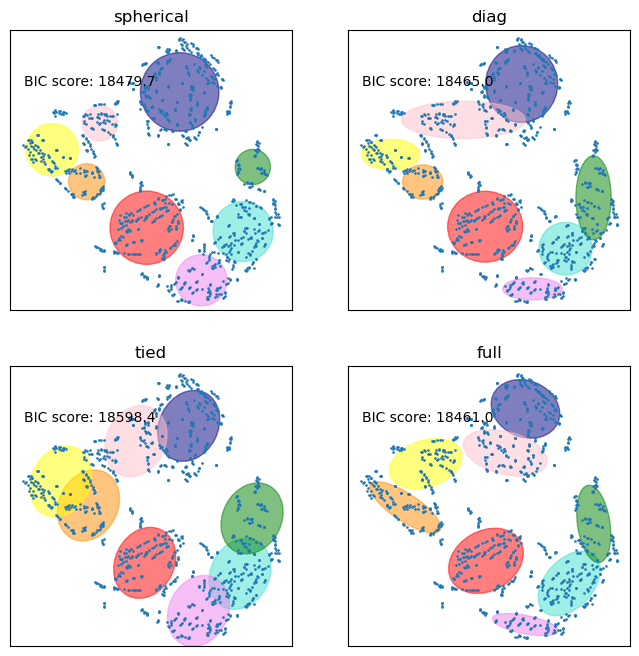

In [77]:
estimators = {cov_type: GaussianMixture(n_components=8,
              covariance_type=cov_type, max_iter=20, random_state=0)
              for cov_type in ['spherical', 'diag', 'tied', 'full']}

n_estimators = len(estimators)
plt.figure(figsize=(4 * n_estimators // 2, 8))

for index, (name, estimator) in enumerate(estimators.items()):
    estimator.fit(X_tsne)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=0.8)


    plt.text(0.05, 0.8, 'BIC score: %.1f' % estimator.bic(X_tsne),
             transform=h.transAxes)
    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.show()

## K-means


### Finding K

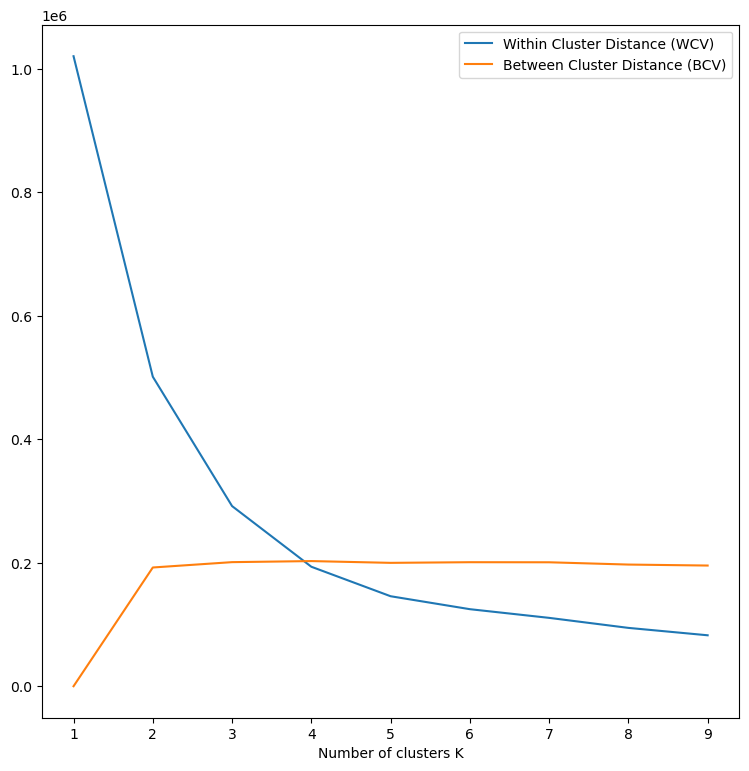

In [78]:
fig1 = plt.figure(figsize=(9, 9))
wcv = {}
bcv = {}

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k,max_iter=1000).fit(X_tsne)
    wcv[k] = kmeans.inertia_ 
    centers = kmeans.cluster_centers_
    BCV = 0
    for i in range(len(centers)):
        for j in range(len(centers)):
            BCV += distance.euclidean(centers[i], centers[j])**2
    if(k==1):
        bcv[1] = 0
    else:
        bcv[k] = BCV/(k*(k-1))*100
plt.plot(list(wcv.keys()), list(wcv.values()), label="Within Cluster Distance (WCV)")
plt.plot(list(bcv.keys()), list(bcv.values()), label="Between Cluster Distance (BCV)")
plt.xlabel("Number of clusters K")
plt.legend()
plt.show()


3


<Figure size 500x500 with 0 Axes>

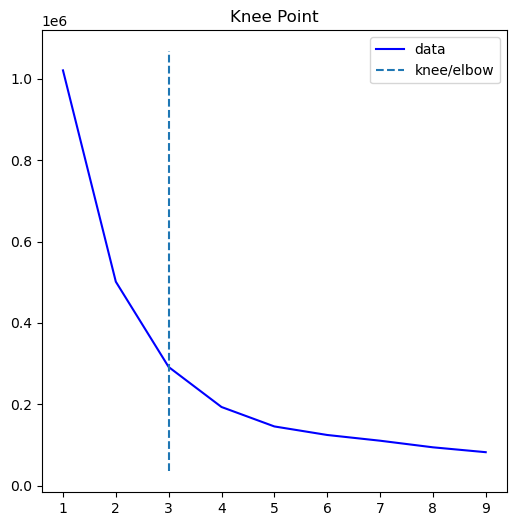

In [79]:
from kneed import KneeLocator

# i = np.arange(len(distances))
knee = KneeLocator(list(wcv.keys()), list(wcv.values()), S=1, curve='convex', direction='decreasing')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()


print(knee.knee)

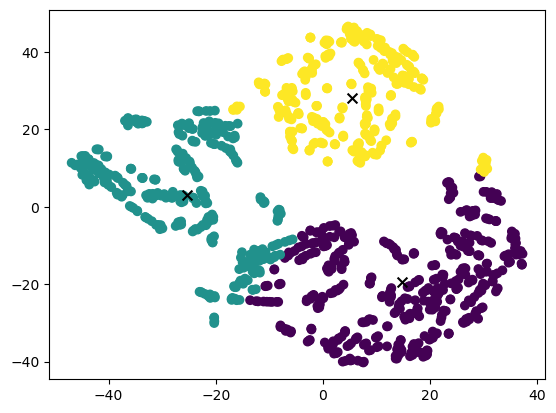

In [80]:
estimator = KMeans(init='random', n_clusters=3, random_state=1, n_init=1, max_iter=70)
y_pred = estimator.fit_predict(X_tsne) 

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred)
plt.scatter(estimator.cluster_centers_[:,0],estimator.cluster_centers_[:,1], s=50, marker='x', color="black")

## Hierarchical clustering

In [81]:
from sklearn.cluster import AgglomerativeClustering


### Choosing number of clusters using Calinski-Harabasz score

In [82]:
from sklearn.metrics import calinski_harabasz_score

results = {}
for i in range(2,11):
    clusterx = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
    labels=clusterx.fit_predict(X_tsne)
    db_index = calinski_harabasz_score(X_tsne, labels)
    results.update({i: db_index})

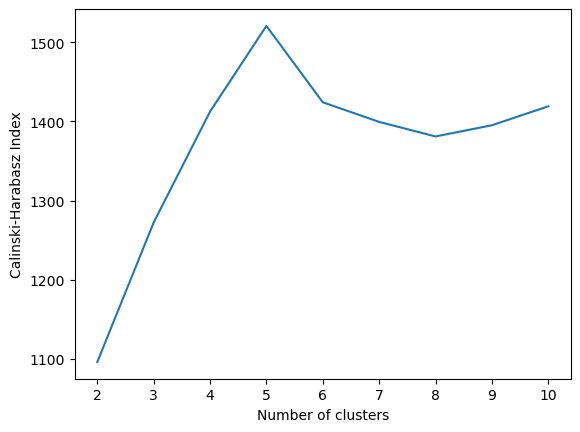

In [83]:
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Calinski-Harabasz Index")
plt.show()

In [84]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(X_tsne)

array([2, 2, 2, ..., 0, 0, 0], dtype=int64)

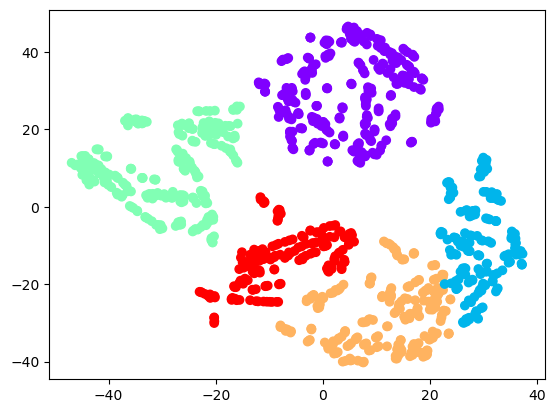

In [85]:
plt.scatter(X_tsne[:,0],X_tsne[:,1], c=cluster.labels_, cmap='rainbow')

## DBSCAN

##### Poradi toa shto imame 2 dimenzionalni podatoci (po reduciranje na dimenzionalnosta) min_samples go stavame da e 4.

### Choosing Eps

In [86]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=4)
neighbors = nearest_neighbors.fit(X_tsne)

distances, indices = neighbors.kneighbors(X_tsne)
distances = np.sort(distances[:,3], axis=0)

Text(0, 0.5, 'Distance')

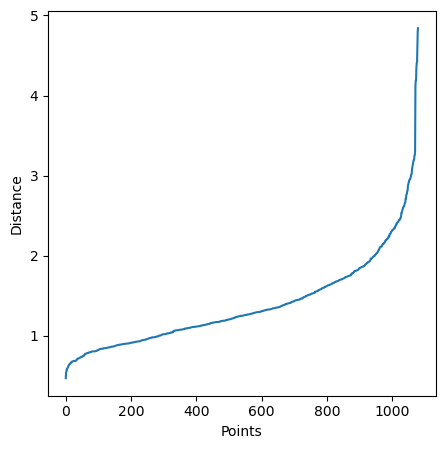

In [87]:
fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

2.9533534394102037


<Figure size 500x500 with 0 Axes>

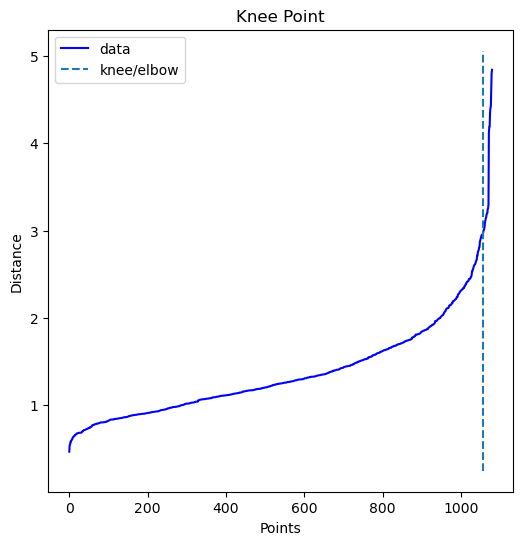

In [88]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

In [89]:
dbscan_cluster1 = DBSCAN(eps=2.95, min_samples=4)
dbscan_cluster1.fit(X_tsne)

DBSCAN(eps=2.95, min_samples=4)

Text(0, 0.5, '$x_2$')

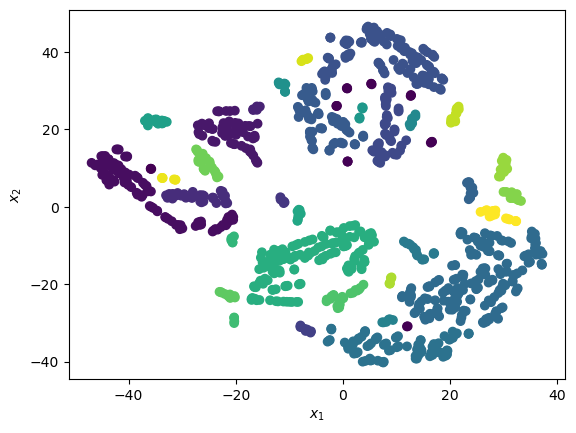

In [90]:
plt.scatter(X_tsne[:, 0], 
            X_tsne[:, 1], 
            c=dbscan_cluster1.labels_)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

##### 4te algoritmi davaat razlichni rezultati, najslichni rezultati davaat algoritmot za hierarhisko klasteriranje i GMM